In [37]:
# 添加目录到系统路径方便导入模块，该项目的根目录为".../machine-learning-toy-code"
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
p_parent_path = str(Path().absolute().parent.parent)
sys.path.append(p_parent_path) 
print(f"主目录为：{p_parent_path}")

主目录为：/Users/johnjim/Desktop/machine-learning-toy-code


In [38]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

torch.Size([100, 1, 28, 28])
tensor([[2, 3, 2, 8, 9, 7, 1, 9, 0, 0],
        [3, 4, 0, 1, 2, 1, 1, 1, 7, 2],
        [8, 4, 3, 6, 0, 1, 0, 8, 0, 6],
        [9, 1, 8, 2, 3, 4, 5, 8, 4, 5],
        [2, 8, 2, 4, 9, 7, 8, 1, 2, 3],
        [5, 6, 9, 4, 2, 7, 6, 0, 8, 1],
        [6, 7, 5, 2, 6, 8, 2, 0, 8, 1],
        [1, 8, 4, 1, 8, 0, 6, 4, 0, 4],
        [4, 4, 2, 2, 0, 4, 7, 1, 0, 3],
        [3, 7, 2, 2, 1, 8, 1, 1, 9, 5]])
(302, 302, 3)


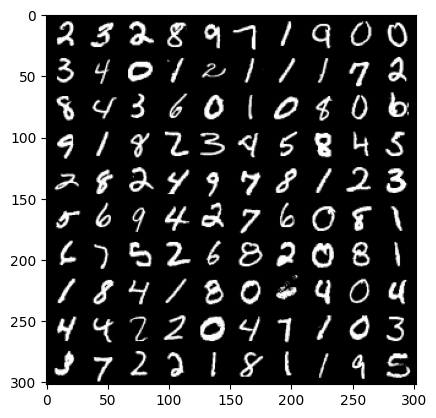

In [39]:
train_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = False, 
                               transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(test_loader))
# 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(images.shape)
print(labels.reshape(10,10))
print(img.shape)
plt.imshow(img)
plt.show()

In [40]:
X_train,y_train = X_train.cpu().numpy(),y_train.cpu().numpy() # tensor转为array形式)
X_test,y_test = X_test.cpu().numpy(),y_test.cpu().numpy() # tensor转为array形式)

In [41]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [42]:
# solver：即使用的优化器，lbfgs：拟牛顿法， sag：随机梯度下降
model = LogisticRegression(solver='lbfgs', max_iter=400) # lbfgs：拟牛顿法
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # 打印报告

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.71      1.00      0.83        10
           2       0.79      0.85      0.81        13
           3       0.79      0.69      0.73        16
           4       0.83      0.91      0.87        11
           5       0.60      0.23      0.33        13
           6       1.00      1.00      1.00         5
           7       0.88      1.00      0.93         7
           8       0.67      0.83      0.74        12
           9       0.71      0.56      0.63         9

    accuracy                           0.75       100
   macro avg       0.75      0.78      0.75       100
weighted avg       0.74      0.75      0.73       100



In [43]:
ones_col=[[1] for i in range(len(X_train))] # 生成全为1的二维嵌套列表，即[[1],[1],...,[1]]
X_train = np.append(X_train,ones_col,axis=1)
x_train = np.mat(X_train)
X_test = np.append(X_test,ones_col,axis=1)
x_test = np.mat(X_test)
# Mnsit有0-9十个标记，由于是二分类任务，所以可以将标记0的作为1，其余为0用于识别是否为0的任务
y_train=np.array([1 if y_train[i]==1 else 0 for i in range(len(y_train))])
y_test=np.array([1 if y_test[i]==1 else 0 for i in range(len(y_test))])

In [44]:
# solver：即使用的优化器，lbfgs：拟牛顿法， sag：随机梯度下降
model = LogisticRegression(solver='lbfgs', max_iter=100) # lbfgs：拟牛顿法
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # 打印报告

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        90
           1       0.83      1.00      0.91        10

    accuracy                           0.98       100
   macro avg       0.92      0.99      0.95       100
weighted avg       0.98      0.98      0.98       100

